<a href="https://colab.research.google.com/github/meenahn79/ANN/blob/master/MNIST_handwritten_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

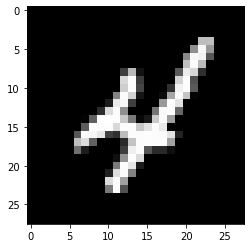

number of training example = 60000 shape of each image= 784
number of testing example = 10000 shape of each image= 784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        

In [52]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library
from keras.utils import np_utils
import keras.models
from keras.layers import Activation, Dense
import seaborn as sns

mnist = tf.keras.datasets.mnist
 # Object of the MNIST dataset 
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

plt.imshow(x_train[9], cmap="gray") # Import the image
plt.show() # Plot the image

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]) # Normalize the training dataset
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]) # Normalize the testing dataset

x_train=x_train/255
x_test= x_test/255

print("number of training example =",x_train.shape[0],"shape of each image=",x_train.shape[1])
print("number of testing example =",x_test.shape[0],"shape of each image=",x_test.shape[1])
print(x_train[0])

print("class label of the first image",y_train[0])
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
print("After converting the output to vector", y_train[0])

#model=keras.models.Sequential([Dense(32,input_shape=(784,)),Activation('relu'),Dense(10),Activation('softmax')])
model=keras.models.Sequential()
model.add(Dense(10, input_shape=(784,)))

# Afterwards, we do automatic shape inference:
model.add(Dense(10))
 # Start training process
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x=x_train, y=y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)

# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

# Print out the model accuracy 
print('\nTest accuracy:', test_acc)
predictions = model.predict_classes([x_test]) # Make prediction
print
#print(np.argmax(predictions[19])) # Print out the number
#plt.imshow(x_test[1], cmap="gray") # Import the image
plt.show()
